Import Packages

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load the Data

In [3]:
parent_dir = '../../data/ping_pong/'

df = pd.read_csv(f'{parent_dir}/aggregate_energy_results.csv')


Preview the Data

In [4]:
print("Data:")
print(df.shape)
df.head(11)

Data:
(11, 4)


,Number of Messages,Iterations,Erlang Energy Consumption(J),Scala Energy Consumption(J)
0,100000,10,8.626267,5.894833e+01
1,500000,10,39.602444,1.788904e+02
2,1000000,10,93.593821,4.974032e+02
3,5000000,10,462.088288,2.131183e+03
4,10000000,10,906.914717,4.382095e+03
5,50000000,10,5249.305055,2.631101e+04
6,100000000,10,9914.101011,5.035373e+04
7,500000000,10,54375.570746,1.494743e+05
8,1000000000,10,104203.957879,2.942778e+05
9,1500000000,10,153874.815542,7.756100e+05


Add Custom Column for N

In [6]:
def format_number_str(nmsg):
    """Formats large numbers into shortened notation (e.g., 1B, 100M, 10M)."""
    if nmsg >= 1_000_000_000:
        return f"{nmsg // 1_000_000_000}B"
    elif nmsg >= 1_000_000:
        return f"{nmsg // 1_000_000}M"
    elif nmsg >= 1_000:
        return f"{nmsg // 1_000}K"
    return str(nmsg)

In [8]:
df['_N'] = "N=" + df['Number of Messages'].apply(format_number_str)  
df.head(15)

,Number of Messages,Iterations,Erlang Energy Consumption(J),Scala Energy Consumption(J),_N
0,100000,10,8.626267,5.894833e+01,N=100K
1,500000,10,39.602444,1.788904e+02,N=500K
2,1000000,10,93.593821,4.974032e+02,N=1M
3,5000000,10,462.088288,2.131183e+03,N=5M
4,10000000,10,906.914717,4.382095e+03,N=10M
5,50000000,10,5249.305055,2.631101e+04,N=50M
6,100000000,10,9914.101011,5.035373e+04,N=100M
7,500000000,10,54375.570746,1.494743e+05,N=500M
8,1000000000,10,104203.957879,2.942778e+05,N=1B
9,1500000000,10,153874.815542,7.756100e+05,N=1B


Visualize the Data

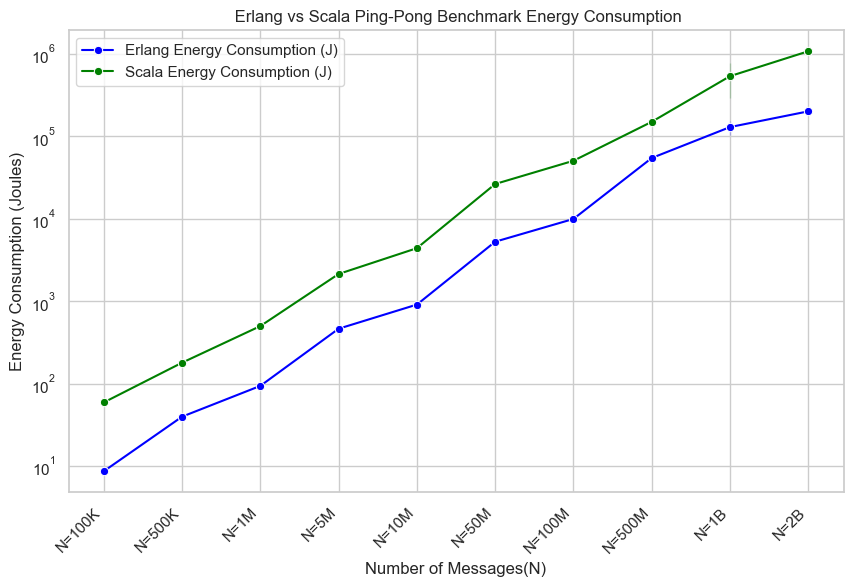

In [11]:
# Set the plot style
sns.set_theme(style="whitegrid", palette="muted")

# Plotting the energy consumption
plt.figure(figsize=(10, 6))

# Plot Erlang and Scala energy consumption
sns.lineplot(x="_N", y="Erlang Energy Consumption(J)", data=df, marker='o', label="Erlang Energy Consumption (J)", color="blue")
sns.lineplot(x="_N", y="Scala Energy Consumption(J)", data=df, marker='o', label="Scala Energy Consumption (J)", color="green")

# Adding labels and title
plt.xlabel("Number of Messages(N)")
plt.ylabel("Energy Consumption (Joules)")
plt.title(" Erlang vs Scala Ping-Pong Benchmark Energy Consumption")
# plt.xscale("log")
plt.yscale("log")

# Display legend
plt.legend()

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.grid(True)
plt.show()
